In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chisquare
sns.set_style(style="darkgrid")

In [2]:
ravensData = pd.read_csv('../data/ravensData.csv').drop('Unnamed: 0', axis=1)

In [3]:
ravensData.head(3)

,ravenWinNum,ravenWin,ravenScore,opponentScore
0,1,W,24,9
1,1,W,38,35
2,1,W,28,13


In [4]:
model = smf.ols(formula='ravenWinNum ~ ravenScore', data=ravensData).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2850,0.257,1.111,0.281,-0.254,0.824
ravenScore,0.0159,0.009,1.755,0.096,-0.003,0.035


## Visualizing fitting logistic regression curves

In [5]:
logit_model = smf.logit(formula='ravenWinNum ~ ravenScore', data=ravensData).fit()
logit_model.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.522369
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.6800,1.554,-1.081,0.280,-4.726,1.366
ravenScore,0.1066,0.067,1.597,0.110,-0.024,0.237


Text(0, 0.5, 'Prob Ravens Win')

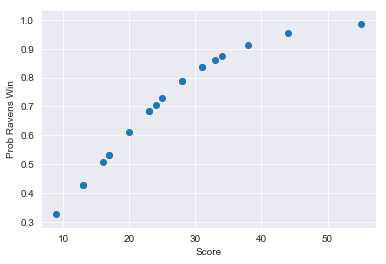

In [6]:
plt.scatter(ravensData['ravenScore'], logit_model.predict(ravensData['ravenScore']))
plt.xlabel('Score')
plt.ylabel('Prob Ravens Win')

In [7]:
np.exp(logit_model.params)

Intercept     0.186372
ravenScore    1.112469
dtype: float64

In [8]:
np.exp(logit_model.conf_int(alpha=0.05))

,0,1
Intercept,0.008862,3.91965
ravenScore,0.976070,1.26793


## Same Logistic Regression Model but using glm api (similar to R code)

In [9]:
glm_model = smf.glm('ravenWinNum ~ ravenScore', data=ravensData, family=sm.families.Binomial()).fit()

In [10]:
glm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            ravenWinNum   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.447
Date:                Tue, 05 Mar 2019   Deviance:                       20.895
Time:                        15:38:07   Pearson chi2:                     17.2
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6800      1.554     -1.081      0.280      -4.726       1.366
ravenScore     0.1066      0.067      1.597      0.110      -0.024       0.237
==============================================================================
"""

Text(0, 0.5, 'Prob Ravens Win')

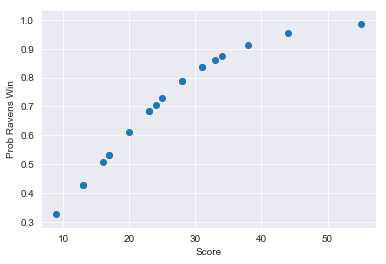

In [11]:
plt.scatter(ravensData['ravenScore'], glm_model.fittedvalues)
plt.xlabel('Score')
plt.ylabel('Prob Ravens Win')